<a href="https://colab.research.google.com/github/skyisthe774/ZAQ/blob/main/jellyfish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip -qq jellyfish.v3i.yolov8.zip

In [2]:
pip install ultralytics # 처음 설치 시 실행 후 런타임 재시작 필요

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 47.6 MB/s eta 0:00:00


In [5]:
import os                   # 시스템 경로 및 파일 관련 기능을 사용하기 위한 라이브러리
import json                 # JSON 데이터를 다루기 위한 라이브러리
import glob                 # 파일 패턴 매칭을 위한 라이브러리
import numpy as np          # 다차원 배열 및 수학 연산 처리를 위한 라이브러리
import pandas as pd         # 데이터프레임을 활용한 데이터 조작 및 분석을 위한 라이브러리
from ast import literal_eval  # 문자열을 코드로 변환하는 함수
from PIL import Image, ImageDraw  # 이미지 처리를 위한 라이브러리
import matplotlib.pyplot as plt  # 시각화를 위한 라이브러리
from tqdm import tqdm        # 반복문의 진행 상황을 표시하는 라이브러리
import random                # 랜덤 함수 사용을 위한 라이브러리
import yaml                  # yaml파일을 다루기 위한 라이브러리
from collections import OrderedDict # collections에서 제공하는 항목의 순서를 기억하는 딕셔너리
import shutil                # 파일의 이동과 복사를 위한 라이브러리
import ultralytics
from ultralytics import YOLO
from IPython.display import Image as show_image
import glob
import random
import matplotlib.pyplot as plt
ultralytics.checks()

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/235.7 GB disk)


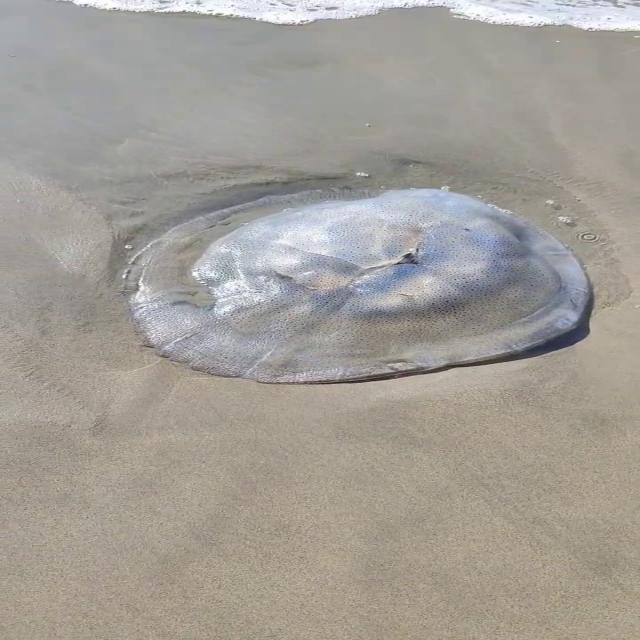

In [10]:
from IPython.display import Image as show_image# ipynb 파일의 cell에서 이미지를 시각화하기 위한 라이브러리
show_image('/content/test/images/frame_-Jellyfish-Fish-Sea-Beach-mp4_frame_0003_jpg.rf.fa163571b373bf8d3333c542a97c87fb.jpg')

In [6]:
project = ".find-jellyfish"
name = "jelly fish"

dataset_path = "data.yaml"

In [7]:
model = YOLO('yolov8n.pt') #yolov8n(나노), yolov8s(스몰), yolov8m(미디움), yolov8l(라지), yolov8x(엑스트라) 등이 있음

100%|██████████| 6.25M/6.25M [00:00<00:00, 241MB/s]


In [23]:
model.train(
    data=dataset_path, # 데이터셋 경로(yaml파일)
    epochs=10, # 최대 학습 epoch
    project=project, # project 폴더 이름
    name=name, # experiment 폴더 이름
    exist_ok=False, # 덮어쓰기 여부
    seed=42, # 재현성을 위한 시드 설정
    optimizer='AdamW', # optimizer는 AdamW로 지정
    patience=5, # 30epoch동안 loss가 개선되지 않으면 종료
    batch=32, # 훈련 배치 사이즈는 16
    imgsz=832, # 이미지 사이즈는 832
    degrees=0.15, # 이미지 회전 -15'~15'
    fliplr= 1 # 이미지 좌우 반전 확률은 0으로 지정 ("2"와 "5" 혼동을 막기 위함)
)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, time=None, patience=5, batch=32, imgsz=832, save=True, save_period=-1, cache=False, device=None, workers=8, project=.find-jellyfish, name=jelly fish3, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning /content/train/labels.cache... 788 images, 32 backgrounds, 0 corrupt: 100%|██████████| 788/788 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valid/labels.cache... 73 images, 2 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to .find-jellyfish/jelly fish3/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 832 train, 832 val
Using 2 dataloader workers
Logging results to .find-jellyfish/jelly fish3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.44G      1.835      1.573      1.982         68        832: 100%|██████████| 25/25 [00:30<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         73        119      0.528      0.535       0.47      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.34G      1.875       1.69       2.05         58        832: 100%|██████████| 25/25 [00:25<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         73        119      0.397      0.395      0.333      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.23G      1.911      1.692      2.044         88        832: 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all         73        119      0.328      0.529      0.343      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.27G      1.891      1.685      2.067         33        832: 100%|██████████| 25/25 [00:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]


                   all         73        119      0.683      0.555      0.589      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       7.5G      1.888      1.632      2.086         20        832: 100%|██████████| 25/25 [00:23<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         73        119      0.296      0.395      0.253     0.0857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.45G      1.831      1.586      1.985         93        832: 100%|██████████| 25/25 [00:26<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]


                   all         73        119      0.564      0.546      0.507      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.01G       1.81      1.542       1.98         17        832: 100%|██████████| 25/25 [00:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         73        119      0.412      0.538      0.424      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.31G      1.779      1.452      1.912         79        832: 100%|██████████| 25/25 [00:24<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         73        119      0.644      0.607      0.652       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.34G      1.711      1.365      1.882         19        832: 100%|██████████| 25/25 [00:27<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         73        119      0.718      0.707      0.729      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.23G      1.684      1.301      1.851         22        832: 100%|██████████| 25/25 [00:28<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         73        119      0.781      0.706      0.735      0.337



10 epochs completed in 0.087 hours.
Optimizer stripped from .find-jellyfish/jelly fish3/weights/last.pt, 6.3MB
Optimizer stripped from .find-jellyfish/jelly fish3/weights/best.pt, 6.3MB

Validating .find-jellyfish/jelly fish3/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]


                   all         73        119      0.767      0.706      0.737      0.337
Speed: 0.4ms preprocess, 4.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to .find-jellyfish/jelly fish3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d52a5cc3820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [13]:
#/content/test

In [14]:
#/content/train

In [ ]:
#/content/valid

In [20]:
os.path.abspath(f"{project}/{name}/results.png")

'/content/.find-jellyfish/jelly fish/results.png'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

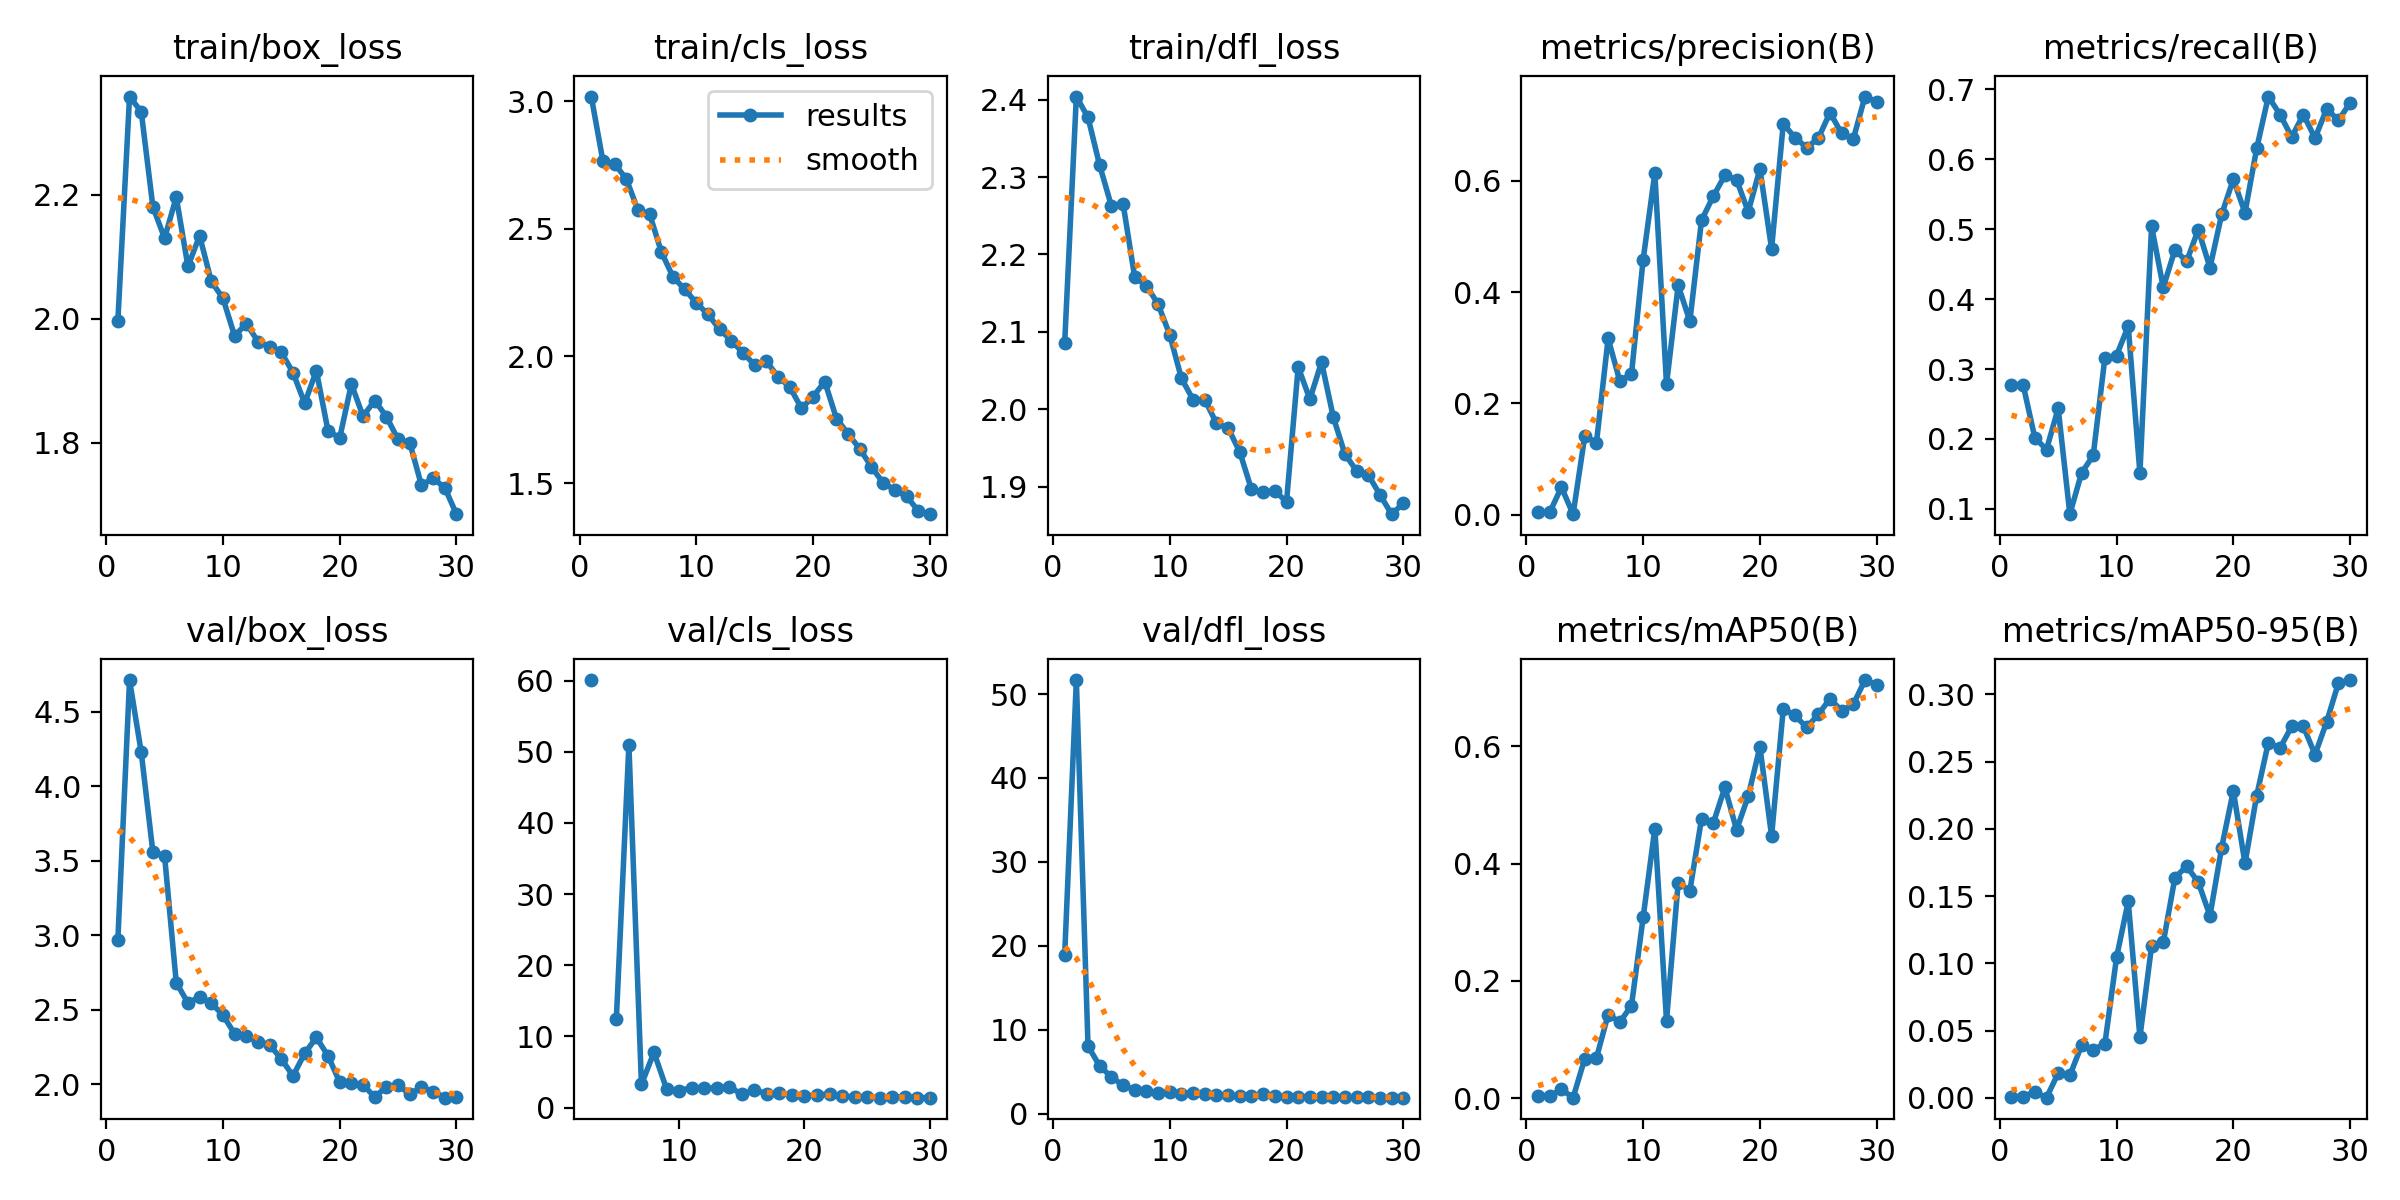

In [24]:
show_image(f"{project}/{name}/results.png", width=800)

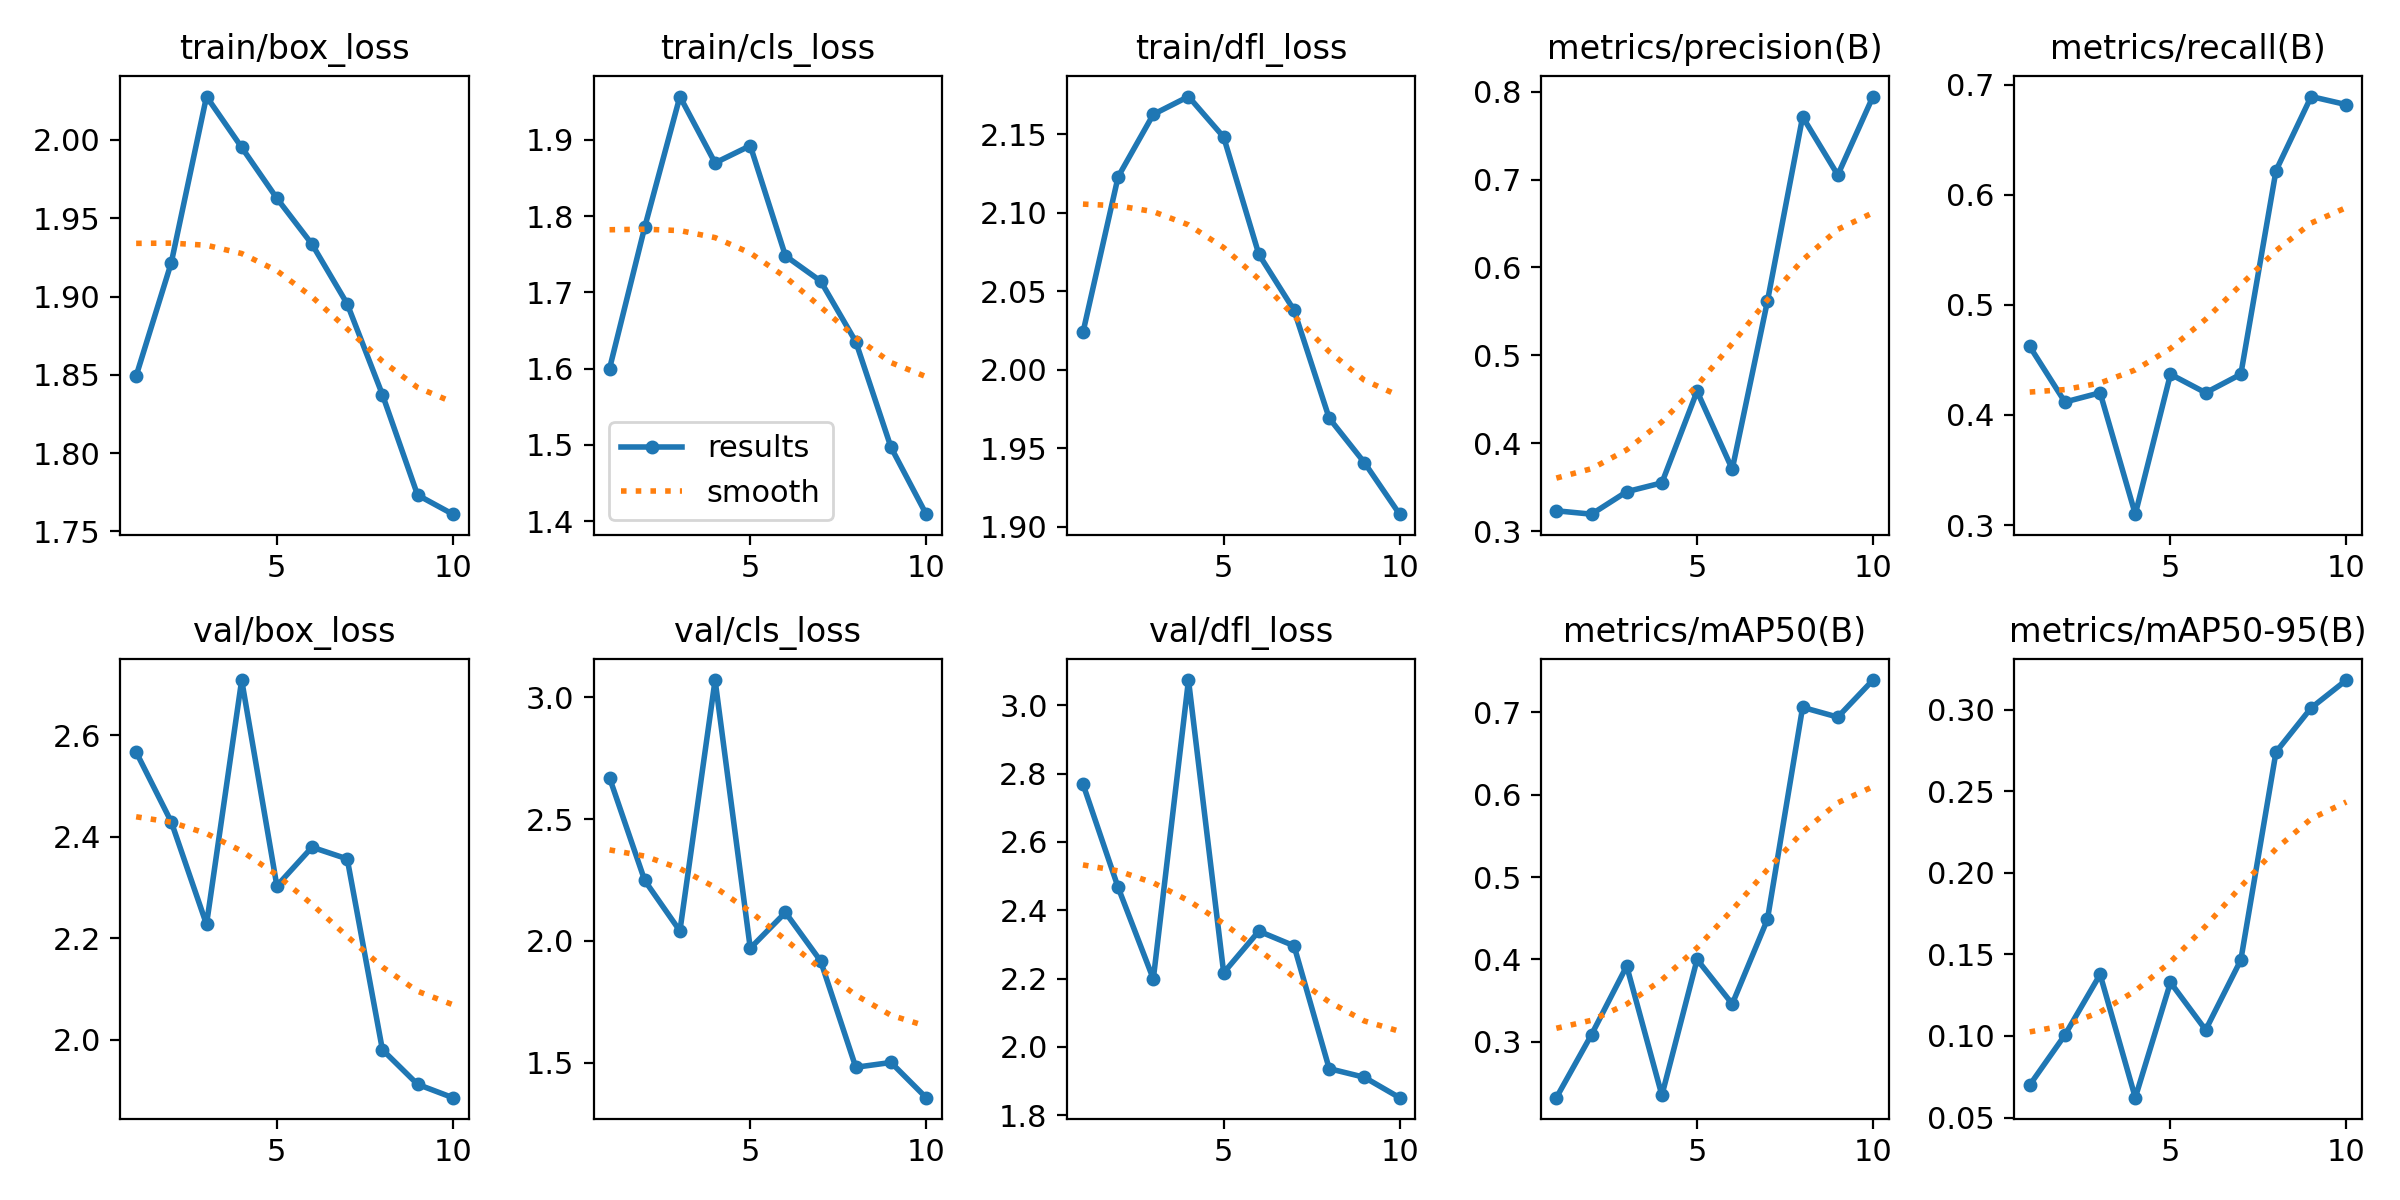

In [22]:
show_image("/content/.find-jellyfish/jelly fish2/results.png", width=800)

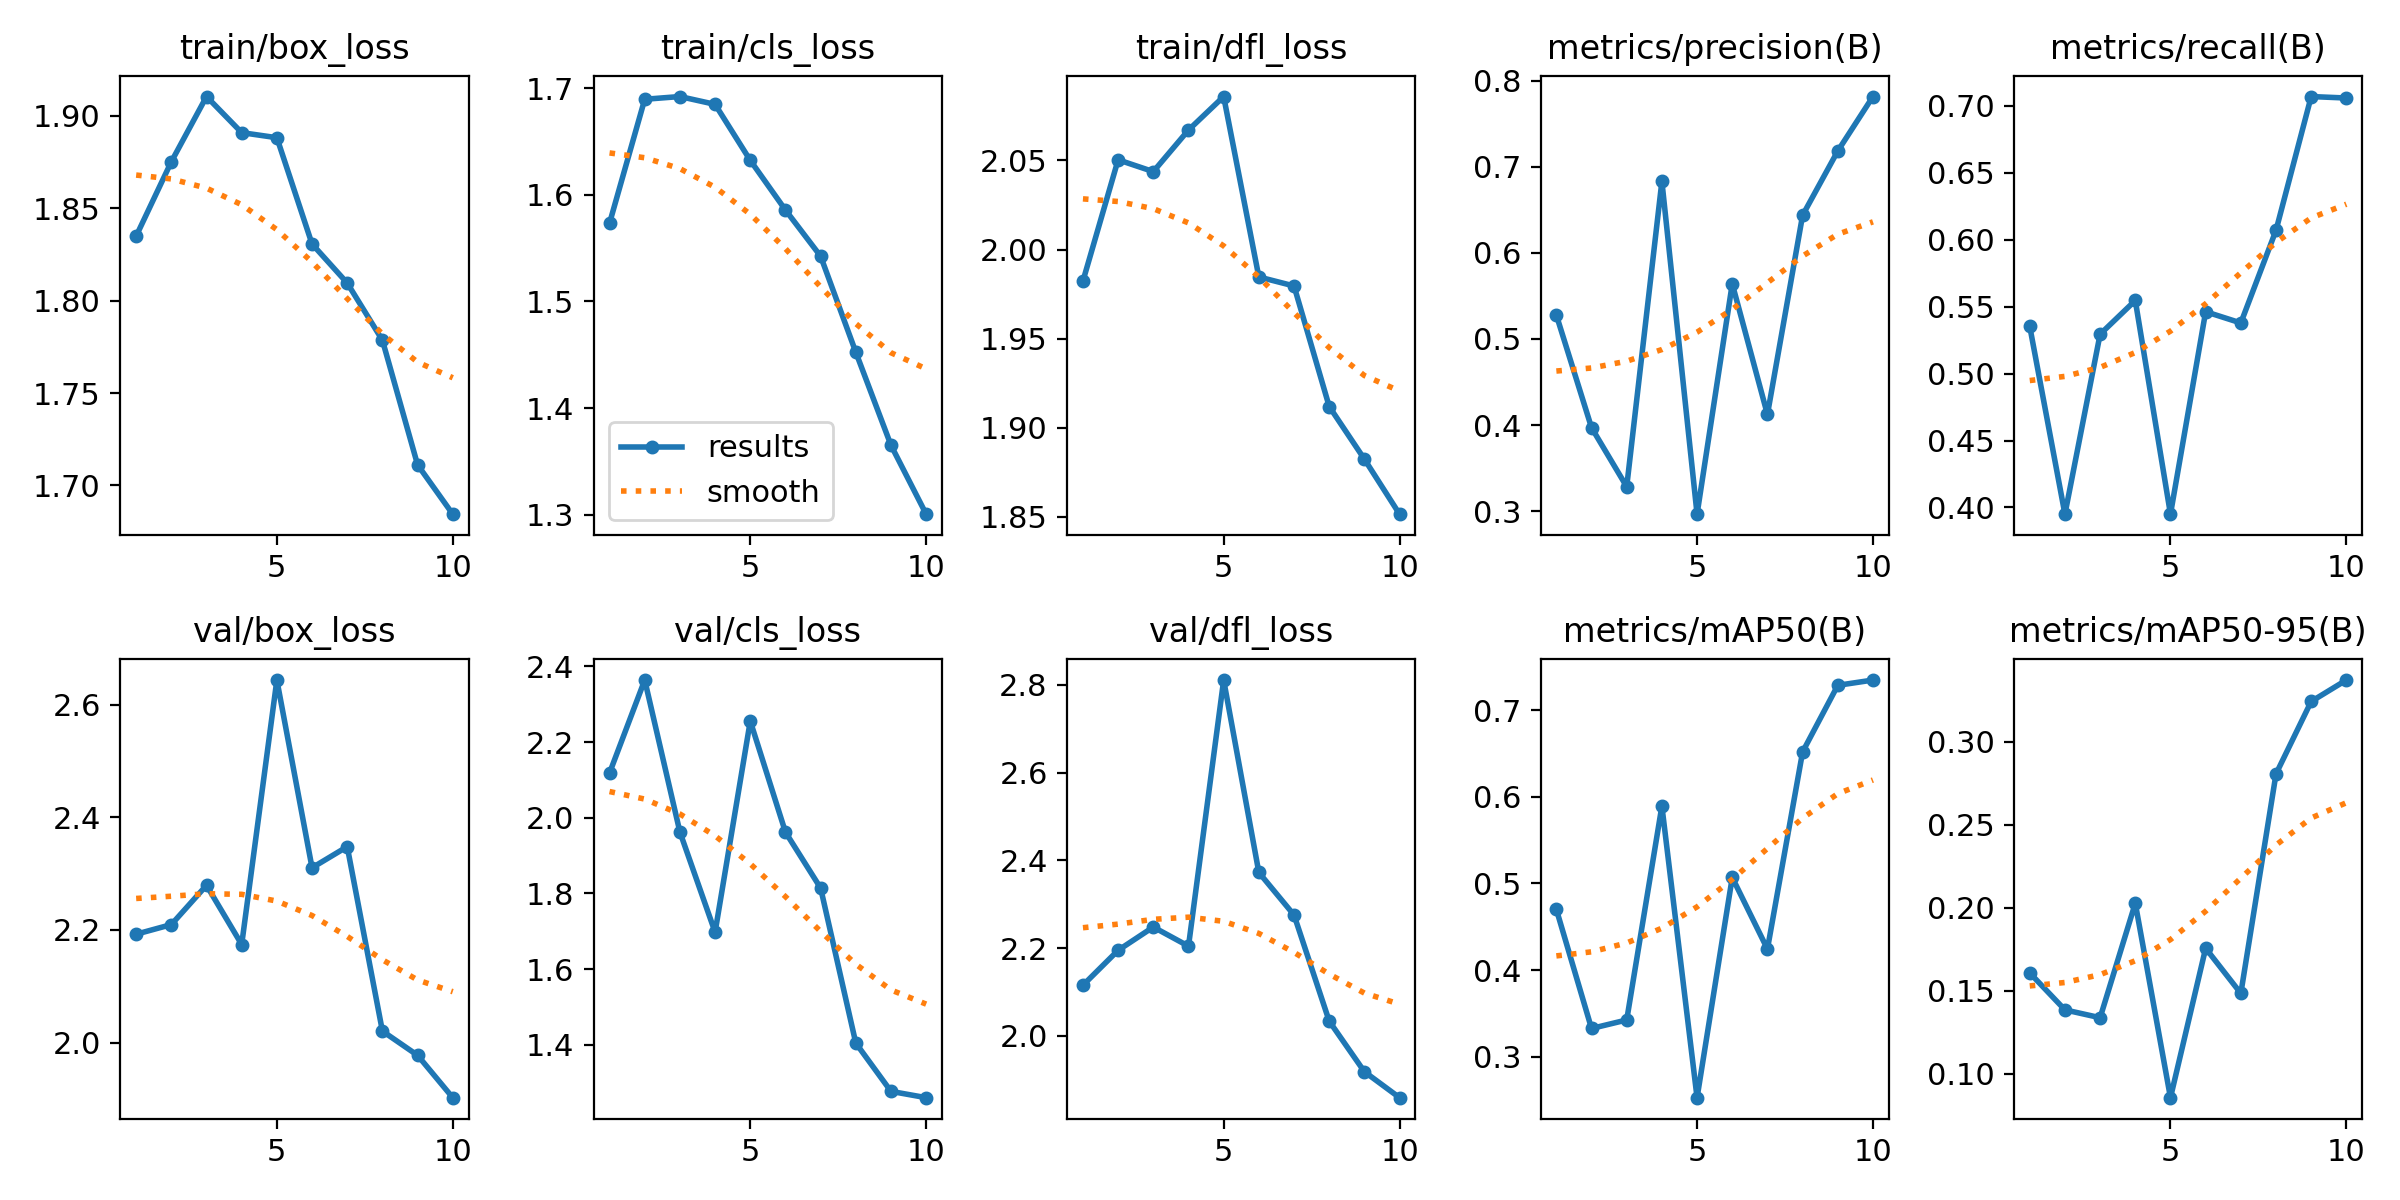

In [27]:
show_image("/content/.find-jellyfish/jelly fish3/results.png", width=800)